In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction

A computer science research group at UBC (led by Frank Woods), set up a Minecraft server and collected data on the types of people in the server as well as how they play the game. Minecraft is a open-world sandbox game that players can freely explore, build structures, and interact with others in the world. To help target recruitment efforts, our group has used the "players" dataset to answer the broad question: "Which 'kinds' of players are most likely to contribute a large amount of data?" The specific question we have chosen is: **"Can player age predict the amount of time a player spends playing in the server in the players.csv dataset?"** The amount of time spent playing in the server represents how much data they contribute to the study, and being able to predict what types of players will contribute more data can help the research team recruit new players effectively.

The "players" dataset, consisting of 196 observations (players) and 7 variables, consists of characteristics of players in the Minecraft server:

- experience (chr)
  - Player's experience level, consisting of: Amateur, Beginner, Regular, Veteran, Pro.
- subscribe (lgl)
  - Whether or not the player is subscribed to the game newsletter, can be TRUE or FALSE.
- hashedEmail (chr)
  - Player's hashed email.
- played_hours (dbl)
  - Number of hours player has played in this server.
  - A potential issue with the way this data was collected is that it only represents the number of hours played in this specific server, and isn't representative of their total number of hours played, which can lead to an inaccurate representation of their commitment/experience.
- name (chr)
  - Player's first name.
- gender (chr)
  - Player's gender, consisting of: Male, Female, Non-binary, Two-spirited, Agender, Prefer not to say, Other.
  - The "Prefer not to say" values pose a potential issue when deciding whether or to treat them as NA values or as their own category.
- Age (dbl)
  - Player's age in years.
  - This column contains some NA values, which need to be removed when performing data manipulation and analysis.

## Methods and Results

In [95]:
# Load players dataset into notebook
players <- read_csv("https://raw.githubusercontent.com/owenkotler/dsci_100_project_group_40/refs/heads/main/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [92]:
# Wrangle data so there are no values with 'NA'
players <- players |>
  filter(!is.na(Age)) |>
  filter(!is.na(played_hours))

The data is in tidy format, as each row depicts a single observation (a unique player), each column represents a single variable (age, name, etc.), and each cell contains a single value.

In [5]:
# Selecting for variables of interest
players_data <- players |>
    select(played_hours, Age)

In [6]:
# Calculating summary statistics for variables of interest
played_hours_summary <- players |>
    summarise(
        played_hours_mean = mean(played_hours),
        played_hours_median = median(played_hours),
        played_hours_range = max(played_hours) - min(played_hours),
        played_hours_sd = sd(played_hours),
        played_hours_Q1 = quantile(played_hours, 0.25),
        played_hours_Q2 = quantile(played_hours, 0.75)) |>
        round(2)
played_hours_summary

age_summary <- players |>
    summarise(
        age_mean = mean(Age),
        age_median = median(Age),
        age_range = max(Age) - min(Age),
        age_sd = sd(Age),
        age_Q1 = quantile(Age, 0.25),
        age_Q2 = quantile(Age, 0.75)) |>
        round(2)
age_summary


played_hours_mean,played_hours_median,played_hours_range,played_hours_sd,played_hours_Q1,played_hours_Q2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.9,0.1,223.1,28.5,0,0.6


age_mean,age_median,age_range,age_sd,age_Q1,age_Q2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.14,19,49,7.39,17,22.75


### Figure 1: Scatterplot showing the relationship between Age and Hours Played with trend line

`geom_smooth()` using formula = 'y ~ x'


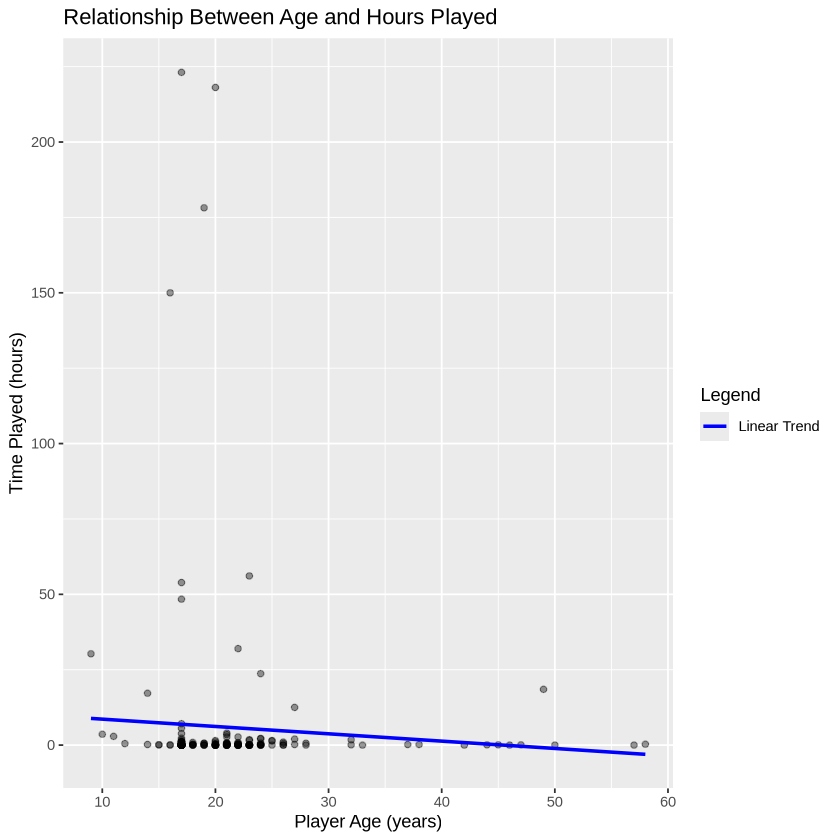

In [7]:
ggplot(players, aes(x=Age, y=played_hours)) +
    geom_point(alpha = 0.4) +
    geom_smooth(aes(colour = "Linear Trend"), method = "lm", se = FALSE) +
    scale_colour_manual(values = c("Linear Trend" = "blue"), name = "Legend") +
    labs(title = "Relationship Between Age and Hours Played",
         x = "Player Age (years)",
         y = "Time Played (hours)")

### Figure 2: Distribution of Player Ages

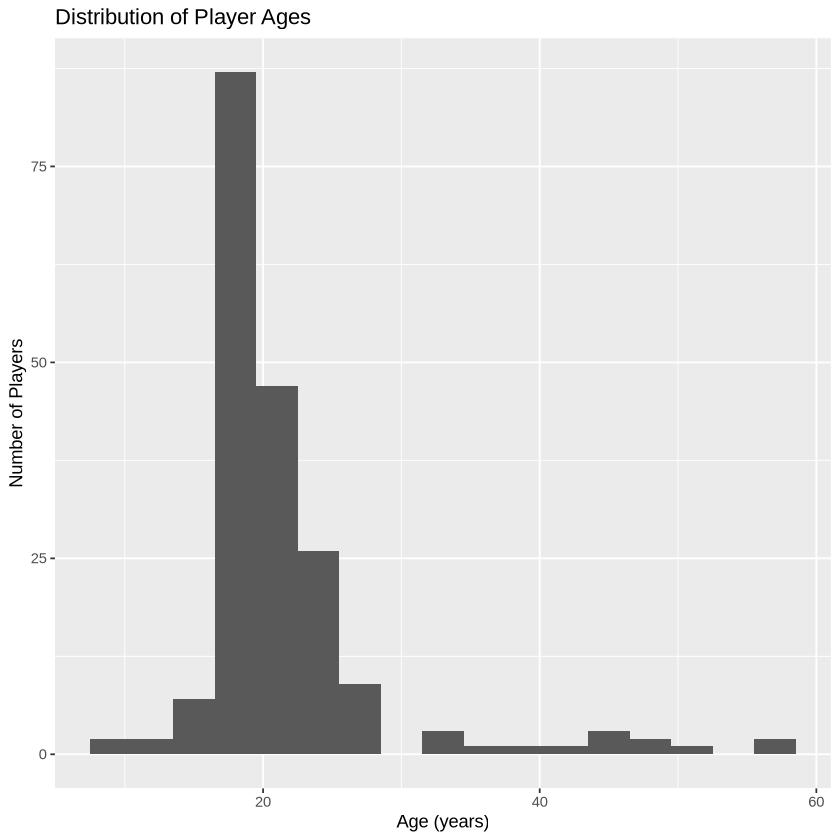

In [8]:
ggplot(players_data, aes(x = Age)) +
  geom_histogram(binwidth = 3) +
  labs(title = "Distribution of Player Ages", x = "Age (years)", y = "Number of Players")

### Figure 3: Distribution of Weekly Hours Played

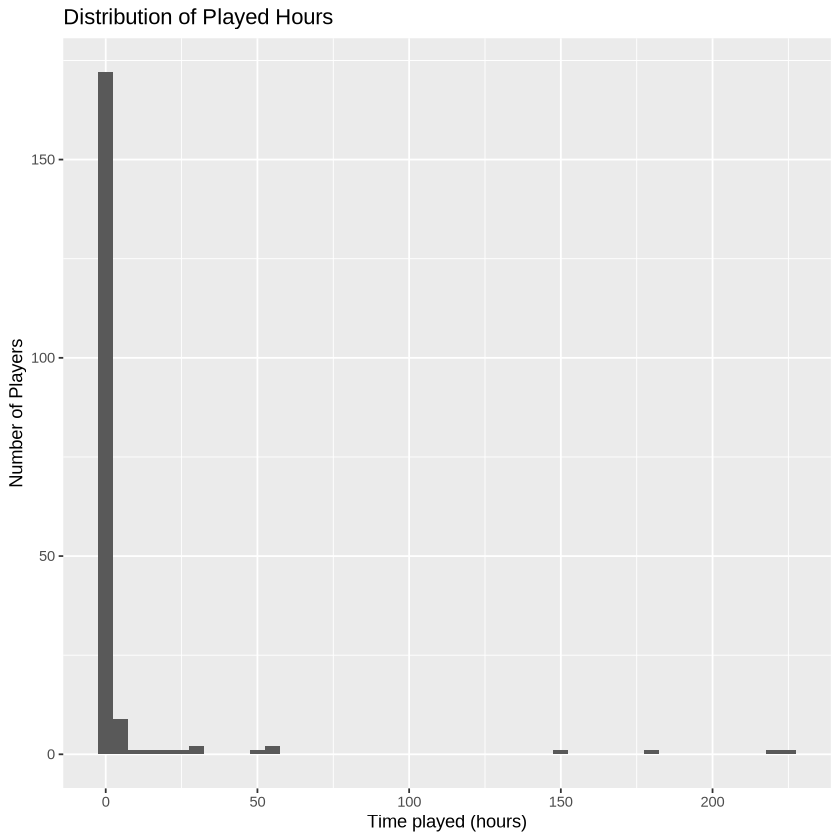

In [9]:
ggplot(players_data, aes(x = played_hours)) +
  geom_histogram(binwidth = 5) +
  labs(title = "Distribution of Played Hours", x = "Time played (hours)", y = "Number of Players")

As can be seen from Figure 3 and the summary statistics, most players play a very low amount of hours, with the median being 0.1 hours and the first quartile being 0 hours. In addition to this, the vast majority of players are around 19-20 years of age, as can be seen from Figure 2. These factors combined cause the majority of data points in Figure 1 to cluster in one area, making it difficult to see a clear trend. There is a slight negative relationship between Age and played hours, however this relationship is weak due to the high variability in hours played among younger players and the scarcity of data for older players.

### Figure 4: Average daily time spent playing games per capita in the United States in 2024, by age group
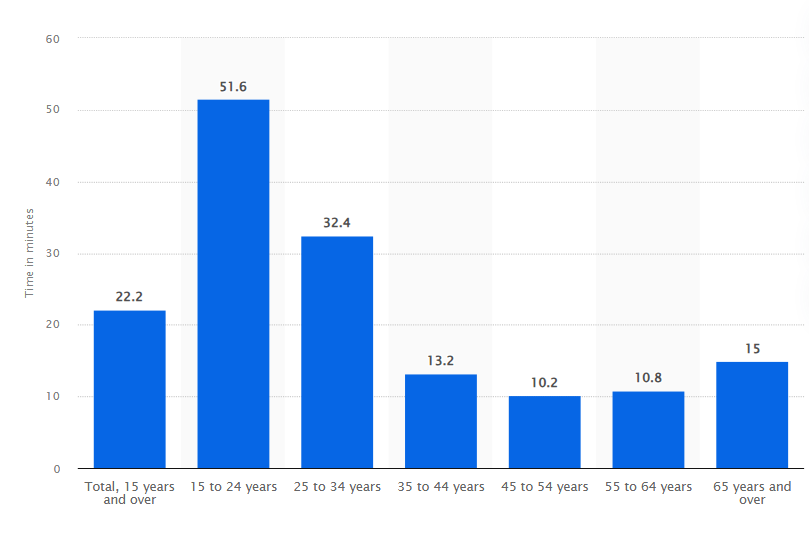
Source: Bureau of Labor Statistics (2024)

Figure 4 shows that there is a strong negative relationship between daily time spent playing video games and age. Because Minecraft is a video game, it would be reasonable to assume that amount of time spent playing Minecraft vs. Age should show a similar trend. So although the players dataset does not show a strong relationship between time played and age due to it being a small dataset, age can be chosen as a good predictor variable of time spent playing Minecraft.

We will be using "Age" as the predictor variable and "played_hours" as the response variable. A k-nearest neighbours (KNN) regression model can be used to address our question because our response variable is quantitative. We will be splitting the dataset into 70% training and 30% testing datasets and using 5-fold cross-validation to select the best k value. Steps for analysis can be seen as comments throughout the code.

In [74]:
# Splitting dataset into training and testing
set.seed(123)
players_split <- initial_split(players_data, prop = 0.7, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

In [89]:
# Training, evaluating, and tuning the model
set.seed(143)
players_recipe <- recipe(played_hours ~ Age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)

players_wkflw <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)    

gridvals <- tibble (neighbors = seq(from = 1, to = 15, by = 1))

players_results <- players_wkflw |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

players_min <- players_results |>
    filter(mean == min(mean))

kmin <- players_min |> pull (neighbors)

kmin

# kmin is the value of k that results in the lowest RMSE


[1] 3

In [90]:
# Evaluate on the test set
set.seed(123)
players_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
    set_engine("kknn") |>
    set_mode("regression")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec2) |>
    fit(data = players_train)

players_preds <- players_fit |>
    predict(players_test) |>
    bind_cols(players_test)

players_summary <- players_preds |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter (.metric == "rmse")

players_summary

# results in RMSPE on test data

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,20.11938


Our test-set evaluation gave us an RMSE of 20.11938 hours, meaning that when the mode predicts how many hours a player spends on the server, its prediction is off by about 20 hours per week on average. This is a very large error relative to the scale of our dataset wehere most players report between 0-40 weekly hours. This therefore indicates that the tuned KNN model cannot accurately predict weekly playtime with age alone as a variable. 

The result also reflects our results from earlier from Figure 1: players of the same age often play different amounts, thus age does not provide enough data to make predict predictions. Even after tuning the model, the predictions provides an overall average rather than capturing the real variation in playtime. The RMSE furthermore indicates that age is a weak and unreliable predictor of hours played on this server.

### Figure 5: Comparison of Actual and Predicted Hours Played vs Age

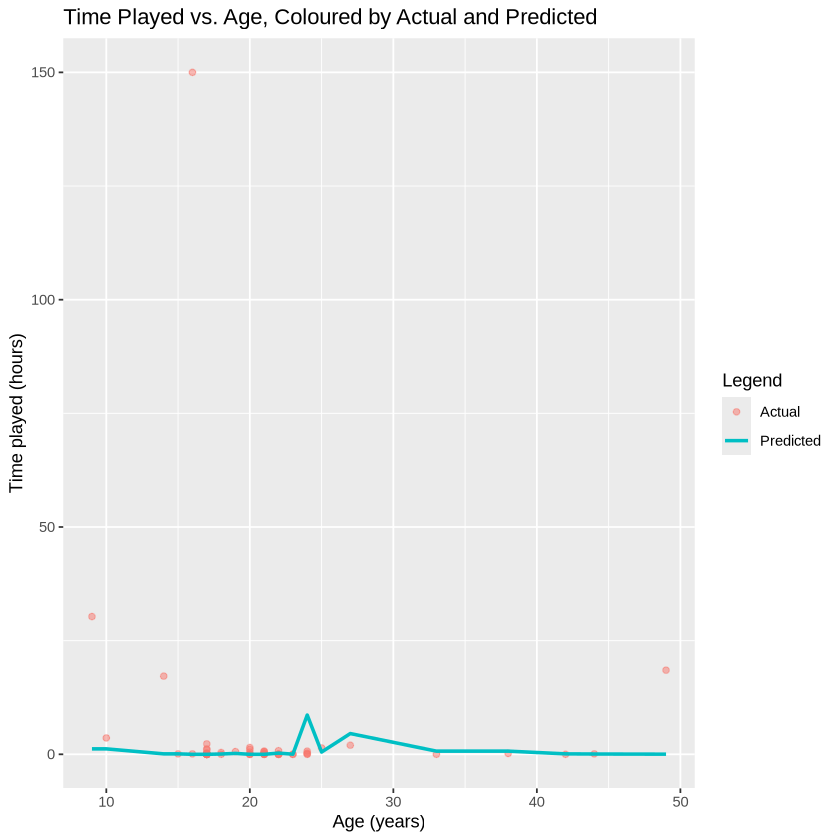

In [91]:
players_plot <- players_preds |>
    ggplot(aes(x=Age, y = played_hours)) +
    geom_point(aes(y = played_hours, color = "Actual"), alpha = 0.5) +
    geom_line(aes(y = .pred, color = "Predicted"), size = 1) +
    labs(x = "Age (years)", y = "Time played (hours)", title = "Time Played vs. Age, Coloured by Actual and Predicted",
        color = "Legend")
    
players_plot

Figure 5 compares the observed values of weekly hours played to the predicted values generated by our KNN regression model. Visually, the plot shows that although the model demonstates a general downward trend where older players tend to spend less hours on the server, the predicted trend maintains relatively flat and fails to reproduce much of the variability in the actual data. Many points either lie far above or below the prediction line, which indicates residual error for players of all ranges of age. Hence, age has limited predictive power on its own since although a broad age-related trend may exist, individual playtime varies widely and the KNN model is unable to account for lots of this variation with a single predictor.

## Discussion

#### Summary of Findings 

Our project aims to determine whether a player's age could be used to predict how many hours they spend on a Minecraft server each week. Through exploratory analysis and the use of KNN regression modelling, we deduced that while age has some correlation with time played, age alone is not a particularly reliable or strong predictor of playtime. Although Figure 1 suggested a slight downward trend that indicated older players may play somewhat less on the average, the relationship was weak and highly variable.

The performance of the model further supported our conclusion. After tuning the number of neighbours and validating the model, the final RMSE was 20.11938 hours indicates an error too large for the model to be practically useful. The KNN prediction curve also did not consider the differences in playtime among players of similar ages. These findings suggest that age is not a useful predictor on its own for a player's engagement level and that it is likely influenced by factors other than age, which could include experience level, free time, gaming habits, etc.

These findings were mostly consistent with our expectations. At first we thought that it would be clear that players aged closer to teenage years would have a larger average weekly hours played, and it would make sense for age to be a reasonable predictor for hours played. However we also kept in mind that while it is reasonable to assume that younger players play more hours on the average, we anticipated that there would be substancial variation within each age group to which the analysis confirmed this. Players of similar ages showed drastically different weekly playtimes, which contributed to concluding that age a weak predictor on its own.

#### Impact of Findings
These findings can be applied for anyone attempting to understand of influence player engagement. If game administrators, server managers, or marketing teams were to target players solely based on age, they would likely make inaccurate predictions on who is active, who is likely to stay engaged, or who might respond. 

This result also raises several future questions: What other variables (such as experience level or gender) might better explain or predict playtime? How would our findings change with a larger or more diverse dataset, perhaps across multiple different servers of games? Would it be closer to our predicted curve?

#### Conclusion

Overall, our project demonstates that while age could provide a small amount of information, meaningful and reliable prediction of player engagement requires richer data and more sophisticated modelling approaches. 


## References

Bureau of Labor Statistics. (September 8, 2025). Average daily time spent playing games per capita in the United 
    States in 2024, by age group (in minutes) [Graph]. In Statista. Retrieved December 01, 2025, from 
    https://www.statista.com/statistics/789835/average-daily-time-playing-games-us-by-age/

Mojang Studios (2011)
https://www.minecraft.net/